# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>

**Today's Goals**
- Give examples of
  - Collecting Twitter data
  - Constructing social graphs with networkx
  - Python tips and tricks
- Discuss the first assignment

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [1]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter

twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [2]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [3]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [4]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [5]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [6]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [7]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [8]:
for i in [1,2,3]:
    print(i)

1
2
3


In [9]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [10]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [11]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [12]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [13]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [14]:
# Print keys.
a_tweet.keys()

dict_keys(['in_reply_to_user_id_str', 'lang', 'contributors', 'in_reply_to_user_id', 'truncated', 'metadata', 'in_reply_to_status_id', 'quoted_status_id', 'coordinates', 'user', 'possibly_sensitive', 'source', 'retweeted', 'entities', 'is_quote_status', 'id', 'place', 'geo', 'id_str', 'favorited', 'in_reply_to_screen_name', 'retweet_count', 'quoted_status_id_str', 'favorite_count', 'retweeted_status', 'text', 'in_reply_to_status_id_str', 'created_at'])

In [15]:
# The text.
print(a_tweet['text'])
print(a_tweet['created_at'])

RT @Khanoisseur: Chicago homicides: 

1992=943  
2015=488

@paulschwartzman @KevinMKruse @realDonaldTrump https://t.co/iquxcEpkQF
Mon Aug 29 17:57:50 +0000 2016


In [16]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Mon Aug 18 18:56:44 +0000 2014',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Die hard Steeler fan. Big on animal rescue and rehab addict. Love Fixer Upper and Tiny House movement. Born to rebuild and decorate. Live & Let Live',
 'entities': {'description': {'urls': []}},
 'favourites_count': 4186,
 'follow_request_sent': False,
 'followers_count': 513,
 'following': False,
 'friends_count': 497,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 2746644052,
 'id_str': '2746644052',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 57,
 'location': 'Florida, #imwithher#nevertrump',
 'name': 'Linda Calderaro',
 'notifications': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_ba

In [17]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=linda_wed1, name=Linda Calderaro, location=Florida, #imwithher#nevertrump


In [18]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for linda_wed1


In [19]:
type(followers[0])

dict

In [20]:
followers[0].keys()

dict_keys(['profile_background_image_url', 'lang', 'profile_background_color', 'is_translation_enabled', 'profile_use_background_image', 'url', 'profile_text_color', 'has_extended_profile', 'profile_banner_url', 'profile_image_url', 'time_zone', 'contributors_enabled', 'id', 'profile_image_url_https', 'blocked_by', 'listed_count', 'live_following', 'description', 'location', 'followers_count', 'verified', 'statuses_count', 'status', 'notifications', 'following', 'profile_background_tile', 'default_profile', 'favourites_count', 'entities', 'name', 'screen_name', 'blocking', 'protected', 'profile_background_image_url_https', 'geo_enabled', 'friends_count', 'profile_link_color', 'id_str', 'is_translator', 'muting', 'default_profile_image', 'utc_offset', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'follow_request_sent', 'created_at'])

In [21]:
followers[0]['screen_name']

'BritsForHill'

In [25]:
# What happens if we get an error?
request = twitter.request('followers/list', {'screen_name': 'this_is_not_a_valid_screen_name', 'count':200})

In [26]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [27]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [28]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % request.text)
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

In [29]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [30]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

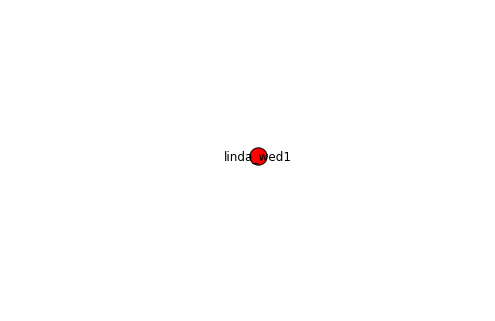

In [31]:
nx.draw(graph, with_labels=True)

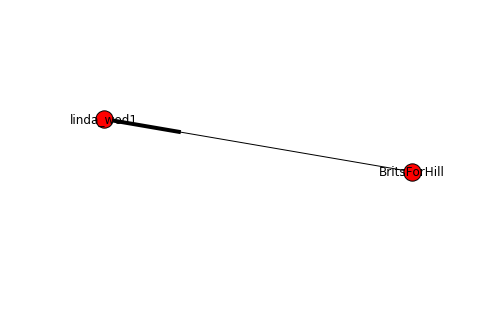

In [32]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

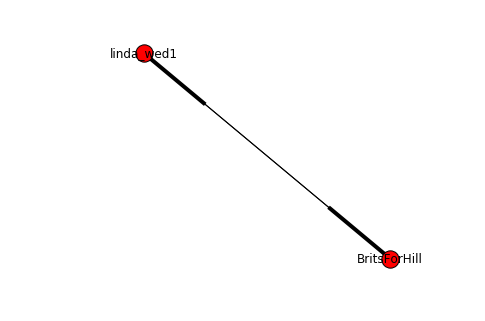

In [33]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [34]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 199 tweets for user linda_wed1


** Why not 200? **

In [35]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

RT @darlene_reid56: Petition re: tax returns #Election2016 #UniteBlue  #TrumpTreason #LyingDonald @realDonaldTrump #AmnestyDon https://t.co…
RT @AnneRiceAuthor: The Clinton Foundation has done so much good. https://t.co/pdZ5wzUfth
RT @Dem4Hillary: @Olivianuzzi @realDonaldTrump the 3 time adulterer wants us to believe he has morals? With Ailes sex harrasser &amp; Bannon wi…
RT @Khanoisseur: Chicago homicides: 

1992=943  
2015=488

@paulschwartzman @KevinMKruse @realDonaldTrump https://t.co/iquxcEpkQF
RT @NateSilver538: I try not to pick fights on Twitter anymore but if I did I'd be all over the absurdity of trying to turn Weinergate into…
@NateSilver538 @ElizabethRowin Agreed...no story!
RT @andendall: Most Billionaires R philanthropists (why not right) But Trump &amp; Charity like Oil &amp; Vinegar
https://t.co/e7IrVguc1w https://t…
RT @Ivanroberson: Fox News Sunday Tells GOP To Shove It, Calls Out Trump’s Lies LIVE On Air (VIDEO) https://t.co/Si2SLydCbI via @Bipartisan…
RT @TheRickyD

In [36]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [37]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1678 unique terms in 199 tweets


[('rt', 189),
 ('the', 85),
 ('to', 69),
 ('a', 63),
 ('trump', 46),
 ('of', 44),
 ('you', 41),
 ('is', 38),
 ('in', 30),
 ('for', 27)]

In [49]:
list(counts.keys())[0]

'years'

In [38]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [43]:
sorted([('joe', 10), ('mary', 20), ('jim', 15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [39]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts))

rt=189
the=85
to=69
a=63
trump=46
of=44
you=41
is=38
in=30
for=27
and=26
he=25
his=24
on=24
donald=20
#amnestydon=17
i=16
your=16
this=16
has=15
it=15
not=14
@realdonaldtrump=14
that=14
&amp;=14
are=13
when=13
about=13
have=13
https:…=12
#nevertrump=12
gop=12
we=11
vote=11
what=11
tax=11
https:/…=11
be=11
hillary=11
out=10
all=10
will=10
as=10
can=10
https://…=10
campaign=10
#imwithher=9
who=9
with=9
trump's=9
clinton=9
https://t…=8
https://t.…=8
but=8
#p2=8
people=8
words=8
by=8
it's=8
don't=7
https…=7
or=7
from=7
trump:=7
ha=7
-=7
if=7
release=7
my=7
can't=7
#uniteblue=7
just=7
republican=6
get=6
htt…=6
make=6
was=6
via=6
time=6
http…=6
at=6
off=6
do=6
@mcspocky:=6
him=6
returns=6
https://t.co…=5
health=5
know=5
america=5
trump’s=5
republicans=5
immigration=5
our=5
because=5
black=5
https://t.c…=5
where=5
after=5
any=5
charity=5
they=5
change=5
would=5
...=4
https://t.co/…=4
into=4
want=4
trying=4
no=4
same=4
#ctl=4
party=4
president=4
still=4
how=4
us=4
heart=4
now=4
@davidpsdem=4
@

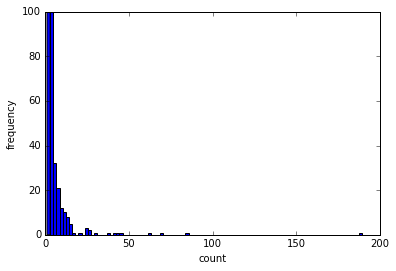

In [40]:
# Plot these counts.
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()

**Zipf's Law**: (roughly) there are many rare words; there are a small number of extremely frequent words.